# Text Flappy Bird game
### By Axel Nguyen--Kerbel

In [1]:
pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git

  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /private/var/folders/qw/6jbfndc564g4n7qnrf4l9s9r0000gn/T/pip-req-build-s32gjb0d
  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /private/var/folders/qw/6jbfndc564g4n7qnrf4l9s9r0000gn/T/pip-req-build-s32gjb0d
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit ca2797e9270195313423324c9d0f205f6cbb3d28
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries
import gymnasium as gym
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from text_flappy_bird_gym.envs.text_flappy_bird_env_simple import TextFlappyBirdEnvSimple

# Monte-Carlo Decayed-Epsilon-Greedy Agent

In [3]:
class MonteCarloDecayedEpsilonGreedyAgent:
    
    def __init__(self, env, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma):
        self.env = env
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.alpha = alpha
        self.alpha_decay = alpha_decay
        self.alpha_min = alpha_min
        self.gamma = gamma
        self.Q = {}  # Q-table
        self.episode_path = []  # store the history of each episode

    def get_action(self, state):
        if state not in self.Q:
            self.Q[state] = [0, 0]  # initialize Q-values for the state

        # Choose the action with the highest Q-value with probability (1 - epsilon)
        if random.random() > self.epsilon:
            if self.Q[state][0] > self.Q[state][1]:
                return 0  # idle
            else:
                return 1  # flap
        else:
            return random.choice([0, 1])  # choose a random action with probability epsilon
        
    def update_path(self, state, action, reward):
        self.episode_path.append((state, action, reward))

    def update_q_values_after_episode(self):
        G = 0
        for state, action, reward in reversed(self.episode_path):
            G = self.gamma*G + reward
            self.Q[state][action] += self.alpha * (G - self.Q[state][action])

        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
        self.alpha = max(self.alpha * self.alpha_decay, self.alpha_min)
        self.episode_path = []


### Function to play the game with the Monte-Carlo agent

In [4]:
# Create a function to play the game with the agent given the inputs : number_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha

def play_mc_game(number_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma):

    env = TextFlappyBirdEnvSimple()
    agent = MonteCarloDecayedEpsilonGreedyAgent(env, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma)
    total_rewards_per_episode = []
    score_per_episode = []

    for episode in tqdm.tqdm(range(number_episodes)):
        state, info = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.get_action(state)
            next_state, reward, done, _, info = env.step(action)
            agent.update_path(state, action, reward)
            total_reward += reward
            state = next_state

            if done:
                break

        agent.update_q_values_after_episode()
        total_rewards_per_episode.append(total_reward)
        score_per_episode.append(info['score'])

    return total_rewards_per_episode, score_per_episode, agent.Q


### Cross-validation to find the best hyperparameters for the MC method

Training with epsilon=0.1, alpha=0.1...

100%|██████████| 5000/5000 [00:00<00:00, 10472.56it/s]


Training with epsilon=0.1, alpha=0.2...

100%|██████████| 5000/5000 [00:01<00:00, 4622.55it/s]


Training with epsilon=0.1, alpha=0.3...

100%|██████████| 5000/5000 [00:04<00:00, 1016.89it/s]


Training with epsilon=0.1, alpha=0.4...

100%|██████████| 5000/5000 [00:10<00:00, 479.26it/s] 


Training with epsilon=0.1, alpha=0.5...

100%|██████████| 5000/5000 [00:03<00:00, 1385.62it/s]


Training with epsilon=0.1, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 941.80it/s] 


Training with epsilon=0.1, alpha=0.7...

100%|██████████| 5000/5000 [00:07<00:00, 679.84it/s] 


Training with epsilon=0.1, alpha=0.8...

100%|██████████| 5000/5000 [00:01<00:00, 2562.30it/s]


Training with epsilon=0.1, alpha=0.9...

100%|██████████| 5000/5000 [00:02<00:00, 2409.06it/s]


Training with epsilon=0.2, alpha=0.1...

100%|██████████| 5000/5000 [00:01<00:00, 4324.74it/s]


Training with epsilon=0.2, alpha=0.2...

100%|██████████| 5000/5000 [00:09<00:00, 516.93it/s] 


Training with epsilon=0.2, alpha=0.3...

100%|██████████| 5000/5000 [00:04<00:00, 1020.27it/s]


Training with epsilon=0.2, alpha=0.4...

100%|██████████| 5000/5000 [00:06<00:00, 826.76it/s] 


Training with epsilon=0.2, alpha=0.5...

100%|██████████| 5000/5000 [00:08<00:00, 589.23it/s] 


Training with epsilon=0.2, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 933.60it/s] 


Training with epsilon=0.2, alpha=0.7...

100%|██████████| 5000/5000 [00:06<00:00, 785.48it/s] 


Training with epsilon=0.2, alpha=0.8...

100%|██████████| 5000/5000 [00:07<00:00, 642.48it/s] 


Training with epsilon=0.2, alpha=0.9...

100%|██████████| 5000/5000 [00:07<00:00, 688.03it/s] 


Training with epsilon=0.3, alpha=0.1...

100%|██████████| 5000/5000 [00:03<00:00, 1459.50it/s]


Training with epsilon=0.3, alpha=0.2...

100%|██████████| 5000/5000 [00:09<00:00, 547.05it/s] 


Training with epsilon=0.3, alpha=0.3...

100%|██████████| 5000/5000 [00:05<00:00, 867.52it/s] 


Training with epsilon=0.3, alpha=0.4...

100%|██████████| 5000/5000 [00:07<00:00, 661.45it/s] 


Training with epsilon=0.3, alpha=0.5...

100%|██████████| 5000/5000 [00:07<00:00, 644.50it/s] 


Training with epsilon=0.3, alpha=0.6...

100%|██████████| 5000/5000 [00:07<00:00, 677.17it/s] 


Training with epsilon=0.3, alpha=0.7...

100%|██████████| 5000/5000 [00:07<00:00, 691.70it/s] 


Training with epsilon=0.3, alpha=0.8...

100%|██████████| 5000/5000 [00:04<00:00, 1176.19it/s]


Training with epsilon=0.3, alpha=0.9...

100%|██████████| 5000/5000 [00:06<00:00, 745.54it/s] 


Training with epsilon=0.4, alpha=0.1...

100%|██████████| 5000/5000 [00:01<00:00, 3314.18it/s]


Training with epsilon=0.4, alpha=0.2...

100%|██████████| 5000/5000 [00:06<00:00, 729.03it/s] 


Training with epsilon=0.4, alpha=0.3...

100%|██████████| 5000/5000 [00:07<00:00, 656.44it/s] 


Training with epsilon=0.4, alpha=0.4...

100%|██████████| 5000/5000 [00:06<00:00, 750.76it/s] 


Training with epsilon=0.4, alpha=0.5...

100%|██████████| 5000/5000 [00:07<00:00, 679.46it/s] 


Training with epsilon=0.4, alpha=0.6...

100%|██████████| 5000/5000 [00:07<00:00, 672.63it/s] 


Training with epsilon=0.4, alpha=0.7...

100%|██████████| 5000/5000 [00:06<00:00, 796.00it/s] 


Training with epsilon=0.4, alpha=0.8...

100%|██████████| 5000/5000 [00:06<00:00, 719.91it/s] 


Training with epsilon=0.4, alpha=0.9...

100%|██████████| 5000/5000 [00:07<00:00, 660.61it/s] 


Training with epsilon=0.5, alpha=0.1...

100%|██████████| 5000/5000 [00:05<00:00, 978.44it/s] 


Training with epsilon=0.5, alpha=0.2...

100%|██████████| 5000/5000 [00:05<00:00, 871.87it/s] 


Training with epsilon=0.5, alpha=0.3...

100%|██████████| 5000/5000 [00:06<00:00, 792.03it/s] 


Training with epsilon=0.5, alpha=0.4...

100%|██████████| 5000/5000 [00:08<00:00, 622.71it/s] 


Training with epsilon=0.5, alpha=0.5...

100%|██████████| 5000/5000 [00:07<00:00, 701.62it/s] 


Training with epsilon=0.5, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 872.45it/s] 


Training with epsilon=0.5, alpha=0.7...

100%|██████████| 5000/5000 [00:06<00:00, 742.19it/s] 


Training with epsilon=0.5, alpha=0.8...

100%|██████████| 5000/5000 [00:06<00:00, 717.50it/s] 


Training with epsilon=0.5, alpha=0.9...

100%|██████████| 5000/5000 [00:05<00:00, 876.64it/s] 


Training with epsilon=0.6, alpha=0.1...

100%|██████████| 5000/5000 [00:04<00:00, 1097.87it/s]


Training with epsilon=0.6, alpha=0.2...

100%|██████████| 5000/5000 [00:04<00:00, 1127.96it/s]


Training with epsilon=0.6, alpha=0.3...

100%|██████████| 5000/5000 [00:06<00:00, 753.89it/s] 


Training with epsilon=0.6, alpha=0.4...

100%|██████████| 5000/5000 [00:06<00:00, 742.54it/s] 


Training with epsilon=0.6, alpha=0.5...

100%|██████████| 5000/5000 [00:06<00:00, 790.94it/s] 


Training with epsilon=0.6, alpha=0.6...

100%|██████████| 5000/5000 [00:06<00:00, 775.16it/s] 


Training with epsilon=0.6, alpha=0.7...

100%|██████████| 5000/5000 [00:06<00:00, 747.43it/s] 


Training with epsilon=0.6, alpha=0.8...

100%|██████████| 5000/5000 [00:06<00:00, 798.77it/s] 


Training with epsilon=0.6, alpha=0.9...

100%|██████████| 5000/5000 [00:04<00:00, 1026.90it/s]


Training with epsilon=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:05<00:00, 949.66it/s] 


Training with epsilon=0.7, alpha=0.2...

100%|██████████| 5000/5000 [00:05<00:00, 837.50it/s] 


Training with epsilon=0.7, alpha=0.3...

100%|██████████| 5000/5000 [00:06<00:00, 757.28it/s] 


Training with epsilon=0.7, alpha=0.4...

100%|██████████| 5000/5000 [00:06<00:00, 764.70it/s] 


Training with epsilon=0.7, alpha=0.5...

100%|██████████| 5000/5000 [00:05<00:00, 888.08it/s] 


Training with epsilon=0.7, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 869.30it/s] 


Training with epsilon=0.7, alpha=0.7...

100%|██████████| 5000/5000 [00:05<00:00, 923.77it/s] 


Training with epsilon=0.7, alpha=0.8...

100%|██████████| 5000/5000 [00:05<00:00, 877.07it/s] 


Training with epsilon=0.7, alpha=0.9...

100%|██████████| 5000/5000 [00:05<00:00, 846.95it/s] 


Training with epsilon=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:02<00:00, 1835.37it/s]


Training with epsilon=0.8, alpha=0.2...

100%|██████████| 5000/5000 [00:04<00:00, 1154.36it/s]


Training with epsilon=0.8, alpha=0.3...

100%|██████████| 5000/5000 [00:06<00:00, 776.48it/s] 


Training with epsilon=0.8, alpha=0.4...

100%|██████████| 5000/5000 [00:05<00:00, 877.79it/s] 


Training with epsilon=0.8, alpha=0.5...

100%|██████████| 5000/5000 [00:04<00:00, 1225.48it/s] 


Training with epsilon=0.8, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 876.31it/s] 


Training with epsilon=0.8, alpha=0.7...

100%|██████████| 5000/5000 [00:05<00:00, 842.05it/s]  


Training with epsilon=0.8, alpha=0.8...

100%|██████████| 5000/5000 [00:04<00:00, 1034.60it/s] 


Training with epsilon=0.8, alpha=0.9...

100%|██████████| 5000/5000 [00:04<00:00, 1060.60it/s] 


Training with epsilon=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:05<00:00, 989.49it/s]  


Training with epsilon=0.9, alpha=0.2...

100%|██████████| 5000/5000 [00:05<00:00, 987.85it/s]  


Training with epsilon=0.9, alpha=0.3...

100%|██████████| 5000/5000 [00:05<00:00, 971.98it/s]  


Training with epsilon=0.9, alpha=0.4...

100%|██████████| 5000/5000 [00:04<00:00, 1089.35it/s] 


Training with epsilon=0.9, alpha=0.5...

100%|██████████| 5000/5000 [00:05<00:00, 918.07it/s]  


Training with epsilon=0.9, alpha=0.6...

100%|██████████| 5000/5000 [00:05<00:00, 959.75it/s]  


Training with epsilon=0.9, alpha=0.7...

100%|██████████| 5000/5000 [00:05<00:00, 912.82it/s]  


Training with epsilon=0.9, alpha=0.8...

100%|██████████| 5000/5000 [00:04<00:00, 1002.52it/s] 


Training with epsilon=0.9, alpha=0.9...

100%|██████████| 5000/5000 [00:05<00:00, 980.09it/s]  


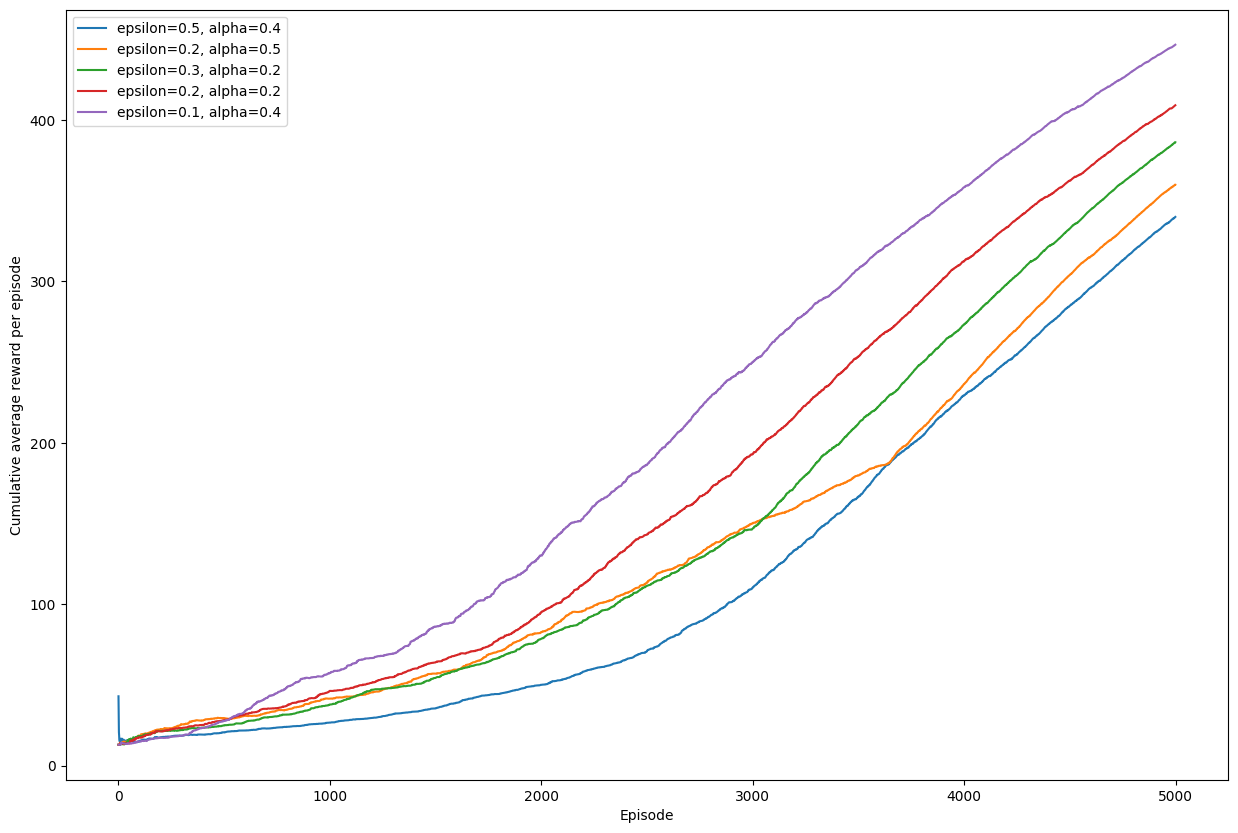

In [5]:
# Cross-validation of the hyperparameters

# Fixed parameters
max_steps = 1000
num_episodes = 5000
epsilon_decay = 0.999
epsilon_min = 0.001
alpha_decay = 0.999
alpha_min = 0.001
gamma = 0.99

# Define the hyperparameters to cross-validate
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Play the game with all the combinations of hyperparameters
results = {}
for epsilon in epsilon_values:
        for alpha in alpha_values:
            print('Training with epsilon={}, alpha={}'.format(epsilon, alpha), end='...')
            total_rewards_per_episode, score_per_episode, Q_values = play_mc_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma)
            results[(epsilon, alpha)] = (total_rewards_per_episode, score_per_episode)

# Plot the cumulative average rewards per episode for the five best hyperparameter combinations (according to the final average cumulative reward)
best_hyperparameters = sorted(results.keys(), key=lambda hyperparameters: np.mean(results[hyperparameters][0]))[-5:]
plt.figure(figsize=(15, 10))
for i, hyperparameters in enumerate(best_hyperparameters):
    total_rewards_per_episode, _ = results[hyperparameters]
    plt.plot(np.cumsum(total_rewards_per_episode) / (np.arange(num_episodes) + 1), label='epsilon={}, alpha={}'.format(*hyperparameters))
plt.xlabel('Episode')
plt.ylabel('Cumulative average reward per episode')
plt.legend()
plt.show()

### Play with the five best hyperparameters combinations on the final number of episodes

100%|██████████| 100000/100000 [06:18<00:00, 264.50it/s]


epsilon=0.5, alpha=0.4: final average cumulative reward=797.29356


100%|██████████| 100000/100000 [07:18<00:00, 228.26it/s]


epsilon=0.2, alpha=0.5: final average cumulative reward=922.74504


100%|██████████| 100000/100000 [04:24<00:00, 378.43it/s]


epsilon=0.3, alpha=0.2: final average cumulative reward=560.2707


100%|██████████| 100000/100000 [02:20<00:00, 712.96it/s]


epsilon=0.2, alpha=0.2: final average cumulative reward=295.30635


100%|██████████| 100000/100000 [00:47<00:00, 2089.23it/s]


epsilon=0.1, alpha=0.4: final average cumulative reward=101.51016


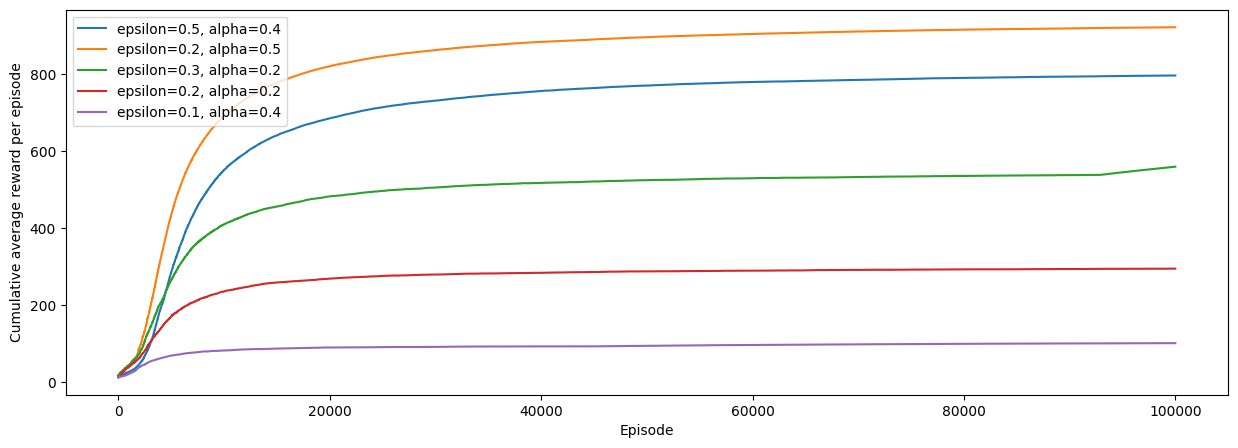

In [6]:
#Number of episodes
num_episodes = 100000

# Find the five best hyperparameters
best_hyperparameters = sorted(results.keys(), key=lambda hyperparameters: np.mean(results[hyperparameters][0]))[-5:]

plt.figure(figsize=(15, 5))

# Train the agent with the five combinations of best hyperparameters
for hyperparameters in best_hyperparameters:
    epsilon, alpha = hyperparameters
    total_rewards_per_episode, score_per_episode, Q_values = play_mc_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma)
    print('epsilon={}, alpha={}: final average cumulative reward={}'.format(epsilon, alpha, np.mean(total_rewards_per_episode)))
    plt.plot(np.cumsum(total_rewards_per_episode) / (np.arange(num_episodes) + 1), label='epsilon={}, alpha={}'.format(epsilon, alpha))

plt.xlabel('Episode')
plt.ylabel('Cumulative average reward per episode')
plt.legend()
plt.show()

### Plot the Q-values for the best combination

100%|██████████| 100000/100000 [06:39<00:00, 250.28it/s]


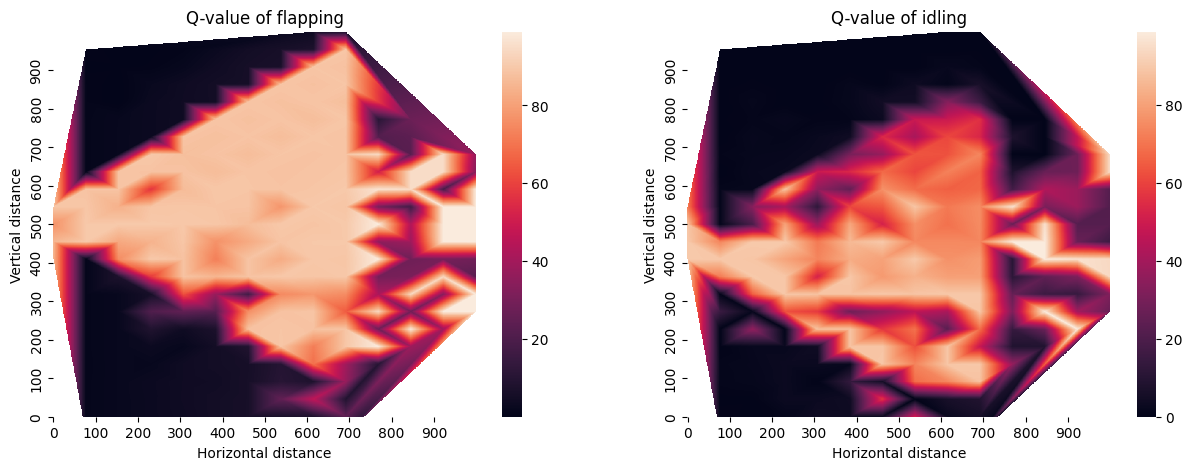

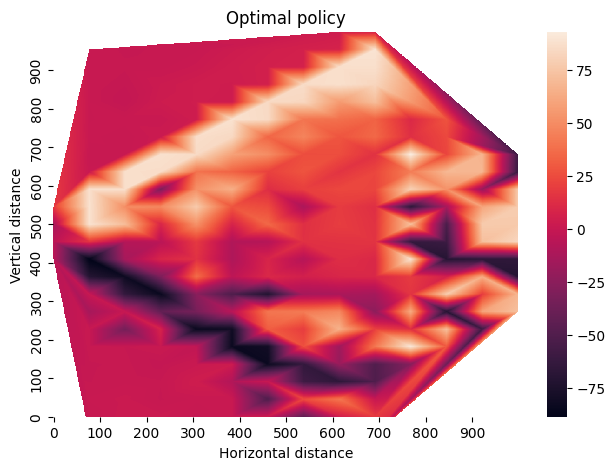

In [24]:

# Play the game with the best hyperparameters and plot the Q-values
epsilon = 0.2
alpha = 0.5
num_episodes = 100000

# Play the game with the best hyperparameters
total_rewards_per_episode_MC, score_per_episode_MC, Q_values_MC = play_mc_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma)

# Plot the Q-values with seaborn heatmap

# Environment parameters
env = TextFlappyBirdEnvSimple()

x_dist_max = env._screen_size[0]-int(env._screen_size[0]*0.3)-1
x_dist_min = 0
y_dist_max = env._screen_size[1]-1-int(env._pipe_gap//2)-1
y_dist_min = -y_dist_max

x_values  = np.linspace(x_dist_min, x_dist_max, num = 1000)
y_values  = np.linspace(y_dist_min, y_dist_max, num = 1000)

X, Y = np.meshgrid(x_values, y_values)

Z_idle = griddata(np.array([state for state in Q_values_MC.keys()]), np.array([Q_values_MC[state][0] for state in Q_values_MC.keys()]), (X, Y), method='linear')
Z_flap = griddata(np.array([state for state in Q_values_MC.keys()]), np.array([Q_values_MC[state][1] for state in Q_values_MC.keys()]), (X, Y), method='linear')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(Z_flap, xticklabels=100, yticklabels=100).invert_yaxis()
plt.title('Q-value of flapping')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.subplot(1, 2, 2)
sns.heatmap(Z_idle, xticklabels=100, yticklabels=100).invert_yaxis()
plt.title('Q-value of idling')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.show()

# Plot the optimal policy for each state
optimal_actions = Z_flap - Z_idle
plt.figure(figsize=(7.5, 5))
sns.heatmap(optimal_actions, xticklabels=100, yticklabels=100).invert_yaxis()
plt.title('Optimal policy')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.show()

# SARSA ($\lambda$) agent

In [16]:
class SARSALambdaAgent:
    
    def __init__(self, env, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd):
        self.env = env
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.alpha = alpha
        self.alpha_decay = alpha_decay
        self.alpha_min = alpha_min
        self.gamma = gamma
        self.lambd = lambd
        self.Q = {}  # Q-table
        self.eligibility_traces = {}

    def get_action(self, state):
        if state not in self.Q:
            self.Q[state] = [0, 0]  # initialize Q-values for the state

        # Choose the action with the highest Q-value with probability (1 - epsilon)
        if random.random() > self.epsilon:
            if self.Q[state][0] > self.Q[state][1]:
                return 0  # idle
            else:
                return 1  # flap
        else:
            return random.choice([0, 1])  # choose a random action with probability epsilon

    def update_q_values_after_step(self, state, action, reward, next_state, next_action):
        if state not in self.eligibility_traces:
            self.eligibility_traces[state] = [0, 0]  # initialize eligibility traces for the state

        if next_state not in self.eligibility_traces:
            self.eligibility_traces[next_state] = [0, 0]  # initialize eligibility traces for the next state
        
        sarsa_delta = reward + self.gamma * self.Q[next_state][next_action] - self.Q[state][action]
        self.eligibility_traces[state][action] += 1  # Increment the eligibility trace for the current state-action pair
        
        for state in self.Q.keys():
            for action in range(len(self.Q[state])):
                self.Q[state][action] += self.alpha * sarsa_delta * self.eligibility_traces[state][action]
                self.eligibility_traces[state][action] *= self.gamma * self.lambd  # Decay the eligibility trace
    
    def update_params_after_episode(self):
        
        # Decay epsilon and alpha
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
        self.alpha = max(self.alpha * self.alpha_decay, self.alpha_min)


### Function to play the game with the SARSA agent

In [17]:
#Create a function to play the game with the agent given the inputs : number_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd

def play_sarsa_game(number_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd):
    env = TextFlappyBirdEnvSimple()
    agent = SARSALambdaAgent(env, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd)
    total_rewards_per_episode = []
    score_per_episode = []

    for episode in tqdm.tqdm(range(number_episodes)):
        state, info = env.reset()
        action = agent.get_action(state)
        total_reward = 0

        for step in range(max_steps):
            next_state, reward, done, _, info = env.step(action)
            next_action = agent.get_action(next_state)
            agent.update_q_values_after_step(state, action, reward, next_state, next_action)
            total_reward += reward
            state = next_state
            action = next_action

            if done:
                break

        total_rewards_per_episode.append(total_reward)
        score_per_episode.append(info['score'])

        agent.update_params_after_episode()

    return total_rewards_per_episode, score_per_episode, agent.Q

### Cross-validation to find the best hyperparameters for the SARSA method

Training with epsilon=0.1, lambd=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:07<00:00, 653.85it/s]


Training with epsilon=0.1, lambd=0.7, alpha=0.3...

100%|██████████| 5000/5000 [00:19<00:00, 251.73it/s]


Training with epsilon=0.1, lambd=0.7, alpha=0.5...

100%|██████████| 5000/5000 [04:18<00:00, 19.34it/s]


Training with epsilon=0.1, lambd=0.7, alpha=0.7...

100%|██████████| 5000/5000 [02:06<00:00, 39.62it/s] 


Training with epsilon=0.1, lambd=0.7, alpha=0.9...

100%|██████████| 5000/5000 [02:33<00:00, 32.54it/s] 


Training with epsilon=0.1, lambd=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:08<00:00, 588.13it/s]


Training with epsilon=0.1, lambd=0.8, alpha=0.3...

100%|██████████| 5000/5000 [00:19<00:00, 251.42it/s]


Training with epsilon=0.1, lambd=0.8, alpha=0.5...

100%|██████████| 5000/5000 [04:30<00:00, 18.47it/s]


Training with epsilon=0.1, lambd=0.8, alpha=0.7...

100%|██████████| 5000/5000 [03:19<00:00, 25.01it/s]


Training with epsilon=0.1, lambd=0.8, alpha=0.9...

100%|██████████| 5000/5000 [01:42<00:00, 48.78it/s] 


Training with epsilon=0.1, lambd=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:08<00:00, 572.58it/s]


Training with epsilon=0.1, lambd=0.9, alpha=0.3...

100%|██████████| 5000/5000 [01:11<00:00, 69.57it/s] 


Training with epsilon=0.1, lambd=0.9, alpha=0.5...

100%|██████████| 5000/5000 [02:34<00:00, 32.35it/s]


Training with epsilon=0.1, lambd=0.9, alpha=0.7...

100%|██████████| 5000/5000 [00:55<00:00, 90.74it/s] 


Training with epsilon=0.1, lambd=0.9, alpha=0.9...

100%|██████████| 5000/5000 [02:26<00:00, 34.05it/s] 


Training with epsilon=0.3, lambd=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:17<00:00, 283.22it/s]


Training with epsilon=0.3, lambd=0.7, alpha=0.3...

100%|██████████| 5000/5000 [04:51<00:00, 17.14it/s]


Training with epsilon=0.3, lambd=0.7, alpha=0.5...

100%|██████████| 5000/5000 [04:10<00:00, 19.94it/s] 


Training with epsilon=0.3, lambd=0.7, alpha=0.7...

100%|██████████| 5000/5000 [01:19<00:00, 63.12it/s] 


Training with epsilon=0.3, lambd=0.7, alpha=0.9...

100%|██████████| 5000/5000 [03:47<00:00, 21.95it/s]  


Training with epsilon=0.3, lambd=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:29<00:00, 171.11it/s]


Training with epsilon=0.3, lambd=0.8, alpha=0.3...

100%|██████████| 5000/5000 [03:46<00:00, 22.10it/s] 


Training with epsilon=0.3, lambd=0.8, alpha=0.5...

100%|██████████| 5000/5000 [02:32<00:00, 32.69it/s] 


Training with epsilon=0.3, lambd=0.8, alpha=0.7...

100%|██████████| 5000/5000 [01:52<00:00, 44.32it/s] 


Training with epsilon=0.3, lambd=0.8, alpha=0.9...

100%|██████████| 5000/5000 [01:29<00:00, 56.18it/s] 


Training with epsilon=0.3, lambd=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:40<00:00, 122.10it/s]


Training with epsilon=0.3, lambd=0.9, alpha=0.3...

100%|██████████| 5000/5000 [01:17<00:00, 64.72it/s] 


Training with epsilon=0.3, lambd=0.9, alpha=0.5...

100%|██████████| 5000/5000 [00:48<00:00, 102.47it/s]


Training with epsilon=0.3, lambd=0.9, alpha=0.7...

100%|██████████| 5000/5000 [02:08<00:00, 39.05it/s] 


Training with epsilon=0.3, lambd=0.9, alpha=0.9...

100%|██████████| 5000/5000 [01:48<00:00, 46.09it/s] 


Training with epsilon=0.5, lambd=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:24<00:00, 206.47it/s]


Training with epsilon=0.5, lambd=0.7, alpha=0.3...

100%|██████████| 5000/5000 [05:14<00:00, 15.87it/s] 


Training with epsilon=0.5, lambd=0.7, alpha=0.5...

100%|██████████| 5000/5000 [01:51<00:00, 44.67it/s] 


Training with epsilon=0.5, lambd=0.7, alpha=0.7...

100%|██████████| 5000/5000 [03:56<00:00, 21.14it/s] 


Training with epsilon=0.5, lambd=0.7, alpha=0.9...

100%|██████████| 5000/5000 [03:06<00:00, 26.85it/s] 


Training with epsilon=0.5, lambd=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:30<00:00, 161.59it/s]


Training with epsilon=0.5, lambd=0.8, alpha=0.3...

100%|██████████| 5000/5000 [04:33<00:00, 18.25it/s] 


Training with epsilon=0.5, lambd=0.8, alpha=0.5...

100%|██████████| 5000/5000 [01:44<00:00, 47.66it/s] 


Training with epsilon=0.5, lambd=0.8, alpha=0.7...

100%|██████████| 5000/5000 [01:56<00:00, 42.99it/s] 


Training with epsilon=0.5, lambd=0.8, alpha=0.9...

100%|██████████| 5000/5000 [04:30<00:00, 18.49it/s] 


Training with epsilon=0.5, lambd=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:39<00:00, 127.59it/s]


Training with epsilon=0.5, lambd=0.9, alpha=0.3...

100%|██████████| 5000/5000 [01:37<00:00, 51.17it/s] 


Training with epsilon=0.5, lambd=0.9, alpha=0.5...

100%|██████████| 5000/5000 [00:47<00:00, 104.52it/s]


Training with epsilon=0.5, lambd=0.9, alpha=0.7...

100%|██████████| 5000/5000 [01:04<00:00, 77.56it/s] 


Training with epsilon=0.5, lambd=0.9, alpha=0.9...

100%|██████████| 5000/5000 [00:48<00:00, 102.40it/s]


Training with epsilon=0.7, lambd=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:29<00:00, 172.27it/s]


Training with epsilon=0.7, lambd=0.7, alpha=0.3...

100%|██████████| 5000/5000 [02:03<00:00, 40.36it/s] 


Training with epsilon=0.7, lambd=0.7, alpha=0.5...

100%|██████████| 5000/5000 [01:05<00:00, 76.68it/s] 


Training with epsilon=0.7, lambd=0.7, alpha=0.7...

100%|██████████| 5000/5000 [30:11<00:00,  2.76it/s]   


Training with epsilon=0.7, lambd=0.7, alpha=0.9...

100%|██████████| 5000/5000 [02:04<00:00, 40.22it/s] 


Training with epsilon=0.7, lambd=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:27<00:00, 178.63it/s]


Training with epsilon=0.7, lambd=0.8, alpha=0.3...

100%|██████████| 5000/5000 [04:50<00:00, 17.22it/s] 


Training with epsilon=0.7, lambd=0.8, alpha=0.5...

100%|██████████| 5000/5000 [02:29<00:00, 33.53it/s] 


Training with epsilon=0.7, lambd=0.8, alpha=0.7...

100%|██████████| 5000/5000 [02:58<00:00, 27.94it/s] 


Training with epsilon=0.7, lambd=0.8, alpha=0.9...

100%|██████████| 5000/5000 [01:23<00:00, 59.75it/s] 


Training with epsilon=0.7, lambd=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:48<00:00, 103.83it/s]


Training with epsilon=0.7, lambd=0.9, alpha=0.3...

100%|██████████| 5000/5000 [03:44<00:00, 22.22it/s] 


Training with epsilon=0.7, lambd=0.9, alpha=0.5...

100%|██████████| 5000/5000 [01:19<00:00, 62.87it/s] 


Training with epsilon=0.7, lambd=0.9, alpha=0.7...

100%|██████████| 5000/5000 [02:40<00:00, 31.17it/s] 


Training with epsilon=0.7, lambd=0.9, alpha=0.9...

100%|██████████| 5000/5000 [01:30<00:00, 55.03it/s] 


Training with epsilon=0.9, lambd=0.7, alpha=0.1...

100%|██████████| 5000/5000 [00:47<00:00, 105.66it/s]


Training with epsilon=0.9, lambd=0.7, alpha=0.3...

100%|██████████| 5000/5000 [03:54<00:00, 21.32it/s] 


Training with epsilon=0.9, lambd=0.7, alpha=0.5...

100%|██████████| 5000/5000 [03:12<00:00, 25.91it/s] 


Training with epsilon=0.9, lambd=0.7, alpha=0.7...

100%|██████████| 5000/5000 [02:09<00:00, 38.48it/s] 


Training with epsilon=0.9, lambd=0.7, alpha=0.9...

100%|██████████| 5000/5000 [02:09<00:00, 38.65it/s] 


Training with epsilon=0.9, lambd=0.8, alpha=0.1...

100%|██████████| 5000/5000 [00:26<00:00, 186.27it/s]


Training with epsilon=0.9, lambd=0.8, alpha=0.3...

100%|██████████| 5000/5000 [02:37<00:00, 31.65it/s] 


Training with epsilon=0.9, lambd=0.8, alpha=0.5...

100%|██████████| 5000/5000 [01:10<00:00, 70.76it/s] 


Training with epsilon=0.9, lambd=0.8, alpha=0.7...

100%|██████████| 5000/5000 [01:16<00:00, 65.20it/s] 


Training with epsilon=0.9, lambd=0.8, alpha=0.9...

100%|██████████| 5000/5000 [01:26<00:00, 57.80it/s] 


Training with epsilon=0.9, lambd=0.9, alpha=0.1...

100%|██████████| 5000/5000 [00:30<00:00, 162.06it/s]


Training with epsilon=0.9, lambd=0.9, alpha=0.3...

100%|██████████| 5000/5000 [01:55<00:00, 43.34it/s] 


Training with epsilon=0.9, lambd=0.9, alpha=0.5...

100%|██████████| 5000/5000 [01:38<00:00, 50.71it/s] 


Training with epsilon=0.9, lambd=0.9, alpha=0.7...

100%|██████████| 5000/5000 [00:37<00:00, 132.87it/s]


Training with epsilon=0.9, lambd=0.9, alpha=0.9...

100%|██████████| 5000/5000 [00:47<00:00, 106.10it/s]


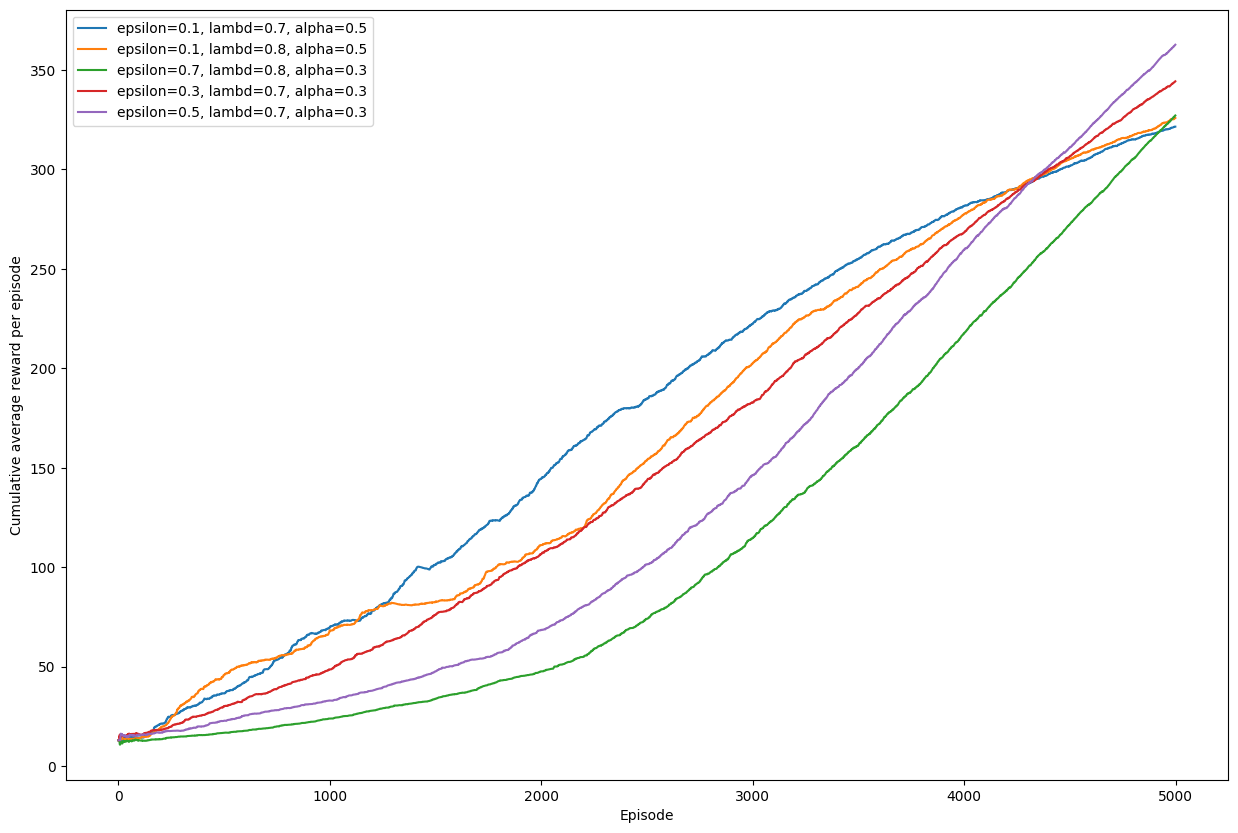

In [18]:
# Cross-validation of the hyperparameters

# Fixed parameters
max_steps = 1000
num_episodes = 5000
epsilon_decay = 0.999
epsilon_min = 0.001
alpha_decay = 0.999
alpha_min = 0.001
gamma = 0.99

# Define the hyperparameters to cross-validate
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]
lambd_values = [0.7, 0.8, 0.9]
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]


# Play the game with all the combinations of hyperparameters
results = {}
for epsilon in epsilon_values:
    for lambd in lambd_values:
        for alpha in alpha_values:
            print('Training with epsilon={}, lambd={}, alpha={}'.format(epsilon, lambd, alpha), end='...')
            total_rewards_per_episode, score_per_episode, Q_values = play_sarsa_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd)
            results[(epsilon, lambd, alpha)] = (total_rewards_per_episode, score_per_episode)

# Plot the cumulative average rewards per episode for the five best hyperparameter combinations (according to the final average cumulative reward)
best_hyperparameters = sorted(results.keys(), key=lambda hyperparameters: np.mean(results[hyperparameters][0]))[-5:]
plt.figure(figsize=(15, 10))
for i, hyperparameters in enumerate(best_hyperparameters):
    total_rewards_per_episode, _ = results[hyperparameters]
    plt.plot(np.cumsum(total_rewards_per_episode) / (np.arange(num_episodes) + 1), label='epsilon={}, lambd={}, alpha={}'.format(*hyperparameters))
plt.xlabel('Episode')
plt.ylabel('Cumulative average reward per episode')
plt.legend()
plt.show()

### Play with the three best hyperparameters combinations on the final number of episodes

100%|██████████| 10000/10000 [05:55<00:00, 28.09it/s]


epsilon=0.7, lambd=0.8, alpha=0.3: final average cumulative reward=202.962


100%|██████████| 10000/10000 [14:01<00:00, 11.89it/s]  


epsilon=0.3, lambd=0.7, alpha=0.3: final average cumulative reward=385.7502


100%|██████████| 10000/10000 [18:24<00:00,  9.06it/s]


epsilon=0.5, lambd=0.7, alpha=0.3: final average cumulative reward=634.4637


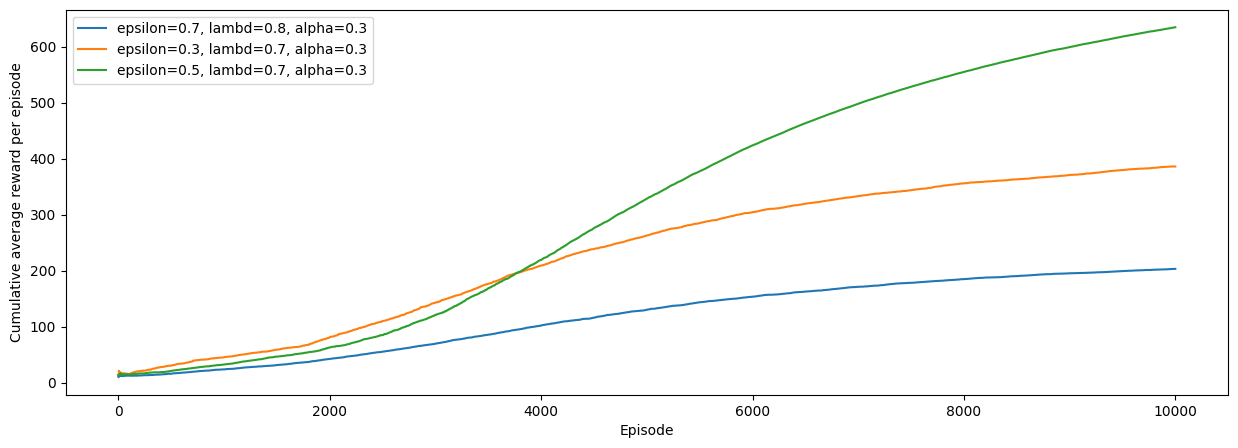

In [20]:
#Number of episodes
num_episodes = 10000

# Find the three best hyperparameters
best_hyperparameters = sorted(results.keys(), key=lambda hyperparameters: np.mean(results[hyperparameters][0]))[-3:]

plt.figure(figsize=(15, 5))

# Train the agent with the five combinations of best hyperparameters
for hyperparameters in best_hyperparameters:
    epsilon, lambd, alpha = hyperparameters
    total_rewards_per_episode, score_per_episode, Q_values = play_sarsa_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd)
    print('epsilon={}, lambd={}, alpha={}: final average cumulative reward={}'.format(epsilon, lambd, alpha, np.mean(total_rewards_per_episode)))
    plt.plot(np.cumsum(total_rewards_per_episode) / (np.arange(num_episodes) + 1), label='epsilon={}, lambd={}, alpha={}'.format(epsilon, lambd, alpha))

plt.xlabel('Episode')
plt.ylabel('Cumulative average reward per episode')
plt.legend()
plt.show()

### Plot the Q-values for the best combination

100%|██████████| 10000/10000 [07:30<00:00, 22.20it/s]


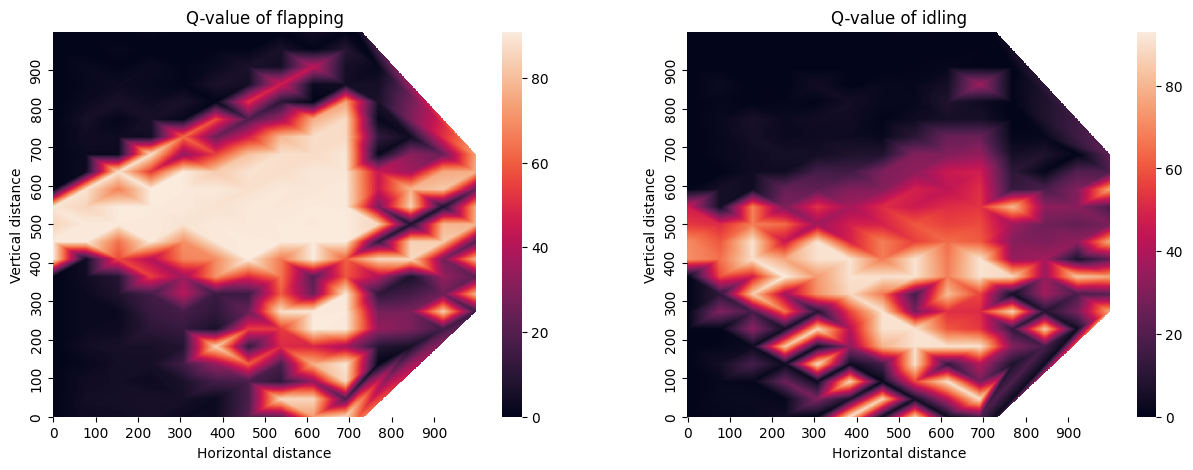

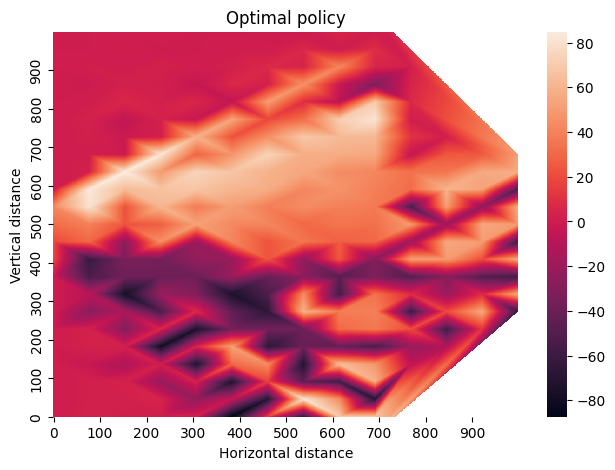

In [25]:
# Define the hyperparameters
epsilon = 0.5
lambd = 0.7
alpha = 0.3
epsilon_decay = 0.999
epsilon_min = 0.001
alpha_decay = 0.999
alpha_min = 0.001
gamma = 0.99


# Define the parameters
num_episodes = 10000
max_steps = 1000

# Play the game with the hyperparameters
total_rewards_per_episode_SARSA, score_per_episode_SARSA, Q_values_SARSA = play_sarsa_game(num_episodes, max_steps, epsilon, epsilon_decay, epsilon_min, alpha, alpha_decay, alpha_min, gamma, lambd)

# Plot the Q-values with seaborn heatmap

# Environment parameters
env = TextFlappyBirdEnvSimple()

x_dist_max = env._screen_size[0]-int(env._screen_size[0]*0.3)-1
x_dist_min = 0
y_dist_max = env._screen_size[1]-1-int(env._pipe_gap//2)-1
y_dist_min = -y_dist_max

x_values  = np.linspace(x_dist_min, x_dist_max, num = 1000)
y_values  = np.linspace(y_dist_min, y_dist_max, num = 1000)

X, Y = np.meshgrid(x_values, y_values)

Z_idle = griddata(np.array([state for state in Q_values_SARSA.keys()]), np.array([Q_values_SARSA[state][0] for state in Q_values_SARSA.keys()]), (X, Y), method='linear')
Z_flap = griddata(np.array([state for state in Q_values_SARSA.keys()]), np.array([Q_values_SARSA[state][1] for state in Q_values_SARSA.keys()]), (X, Y), method='linear')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.heatmap(Z_flap, xticklabels=100, yticklabels=100).invert_yaxis()

plt.title('Q-value of flapping')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.subplot(1, 2, 2)
sns.heatmap(Z_idle, xticklabels=100, yticklabels=100).invert_yaxis()
plt.title('Q-value of idling')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.show()

# Plot the optimal policy for each state
optimal_actions = Z_flap - Z_idle
plt.figure(figsize=(7.5, 5))
sns.heatmap(optimal_actions, xticklabels=100, yticklabels=100).invert_yaxis()
plt.title('Optimal policy')
plt.xlabel('Horizontal distance')
plt.ylabel('Vertical distance')
plt.show()

### Function to play with the learned Q-values in a different environment geometry setup

In [23]:
#Play the game with the two trained agents based on the maximum Q-values learned

# Define a function to play the game with the agent given the inputs : number_episodes, max_steps, Q_values

def play_game_with_Q_values(number_episodes, max_steps, Q_values, width, height, pipe_gap):

    env = TextFlappyBirdEnvSimple(width=width, height=height, pipe_gap=pipe_gap)
    total_rewards_per_episode = []
    score_per_episode = []

    for episode in tqdm.tqdm(range(number_episodes)):
        state, info = env.reset()
        total_reward = 0

        for step in range(max_steps):
            if state not in Q_values:
                Q_values[state] = [0, 0]  # initialize Q-values for the state

            if Q_values[state][0] == Q_values[state][1]:
                action = random.choice([0, 1])

            if Q_values[state][0] > Q_values[state][1]:
                action = 0  # idle
            else:
                action = 1  # flap

            next_state, reward, done, _, info = env.step(action)
            total_reward += reward
            state = next_state

            if done:
                break

        total_rewards_per_episode.append(total_reward)
        score_per_episode.append(info['score'])

    return total_rewards_per_episode, score_per_episode


### Play the game a thousand times in different configurations with the two learned Q-values matrices

In [30]:
# Play the game with the two trained agents based on the maximum Q-values learned with different screen sizes and pipe gaps

# Define the parameters
num_episodes = 1000
max_steps = 1000
pipe_gap = 4

# Play the game with the two trained agents based on the maximum Q-values on a range of all integers between 5 and 25 for the screen height and a range of integers between 10 and 30 for width
results_MC = {}
for width in range(10, 31, 1):
    for height in range(6, 26, 1):
        print('Playing with width={}, height={}'.format(width, height), end='...')
        total_rewards_per_episode, score_per_episode = play_game_with_Q_values(num_episodes, max_steps, Q_values_MC, width, height, pipe_gap)
        results_MC[(width, height)] = (total_rewards_per_episode, score_per_episode)

results_SARSA = {}
for width in range(10, 31, 1):
    for height in range(6, 26, 1):
        print('Playing with width={}, height={}'.format(width, height), end='...')
        total_rewards_per_episode, score_per_episode = play_game_with_Q_values(num_episodes, max_steps, Q_values_SARSA, width, height, pipe_gap)
        results_SARSA[(width, height)] = (total_rewards_per_episode, score_per_episode)

Playing with width=10, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 208.50it/s]


Playing with width=10, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 210.45it/s]


Playing with width=10, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 211.22it/s]


Playing with width=10, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 1168.62it/s]


Playing with width=10, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1536.20it/s]


Playing with width=10, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2367.36it/s]


Playing with width=10, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 3474.32it/s]


Playing with width=10, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 4623.01it/s]


Playing with width=10, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 5897.78it/s]


Playing with width=10, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 7052.98it/s]


Playing with width=10, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 8320.53it/s]


Playing with width=10, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 9169.34it/s]


Playing with width=10, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 10095.42it/s]


Playing with width=10, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 10702.95it/s]


Playing with width=10, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 11580.91it/s]


Playing with width=10, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 11206.36it/s]


Playing with width=10, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 13168.97it/s]


Playing with width=10, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 13788.03it/s]


Playing with width=10, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 14658.27it/s]


Playing with width=10, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 14617.36it/s]


Playing with width=11, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 215.53it/s]


Playing with width=11, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 214.80it/s]


Playing with width=11, height=8...

100%|██████████| 1000/1000 [00:05<00:00, 196.30it/s]


Playing with width=11, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 216.97it/s]


Playing with width=11, height=10...

100%|██████████| 1000/1000 [00:04<00:00, 218.06it/s]


Playing with width=11, height=11...

100%|██████████| 1000/1000 [00:02<00:00, 407.64it/s]


Playing with width=11, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 676.94it/s]


Playing with width=11, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1354.43it/s]


Playing with width=11, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 2322.46it/s]


Playing with width=11, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 3414.44it/s]


Playing with width=11, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 4446.40it/s]


Playing with width=11, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 5327.00it/s]


Playing with width=11, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 6454.16it/s]


Playing with width=11, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 6873.61it/s]


Playing with width=11, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 7965.07it/s]


Playing with width=11, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 7722.67it/s]


Playing with width=11, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 8728.13it/s]


Playing with width=11, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 9029.27it/s]


Playing with width=11, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 10125.15it/s]


Playing with width=11, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 10933.00it/s]


Playing with width=12, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 211.76it/s]


Playing with width=12, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 210.84it/s]


Playing with width=12, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 212.60it/s]


Playing with width=12, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 209.53it/s]


Playing with width=12, height=10...

100%|██████████| 1000/1000 [00:04<00:00, 212.23it/s]


Playing with width=12, height=11...

100%|██████████| 1000/1000 [00:04<00:00, 217.25it/s]


Playing with width=12, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 569.39it/s]


Playing with width=12, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1175.68it/s]


Playing with width=12, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 2278.16it/s]


Playing with width=12, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 3451.30it/s]


Playing with width=12, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 4319.63it/s]


Playing with width=12, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 5281.33it/s]


Playing with width=12, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 5941.49it/s]


Playing with width=12, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 6526.35it/s]


Playing with width=12, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 7146.48it/s]


Playing with width=12, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 7819.64it/s]


Playing with width=12, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 8296.34it/s]


Playing with width=12, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 9149.48it/s]


Playing with width=12, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 8960.68it/s]


Playing with width=12, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 9024.05it/s]


Playing with width=13, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 217.70it/s]


Playing with width=13, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 217.07it/s]


Playing with width=13, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 218.58it/s]


Playing with width=13, height=9...

100%|██████████| 1000/1000 [00:01<00:00, 900.02it/s]


Playing with width=13, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1504.85it/s]


Playing with width=13, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1130.49it/s]


Playing with width=13, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 818.24it/s]


Playing with width=13, height=13...

100%|██████████| 1000/1000 [00:01<00:00, 842.22it/s]


Playing with width=13, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1167.42it/s]


Playing with width=13, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1658.11it/s]


Playing with width=13, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2268.19it/s]


Playing with width=13, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3178.39it/s]


Playing with width=13, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3527.91it/s]


Playing with width=13, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4488.75it/s]


Playing with width=13, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4936.89it/s]


Playing with width=13, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5386.30it/s]


Playing with width=13, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 6006.11it/s]


Playing with width=13, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 6341.63it/s]


Playing with width=13, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6836.67it/s]


Playing with width=13, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 7519.81it/s]


Playing with width=14, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 216.23it/s]


Playing with width=14, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 210.70it/s]


Playing with width=14, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 205.37it/s]


Playing with width=14, height=9...

100%|██████████| 1000/1000 [00:01<00:00, 935.55it/s]


Playing with width=14, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1439.44it/s]


Playing with width=14, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1066.13it/s]


Playing with width=14, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 877.55it/s]


Playing with width=14, height=13...

100%|██████████| 1000/1000 [00:01<00:00, 913.35it/s]


Playing with width=14, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1243.28it/s]


Playing with width=14, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1733.76it/s]


Playing with width=14, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2447.20it/s]


Playing with width=14, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3066.38it/s]


Playing with width=14, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3593.89it/s]


Playing with width=14, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4371.64it/s]


Playing with width=14, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 5058.92it/s]


Playing with width=14, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5496.68it/s]


Playing with width=14, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5871.61it/s]


Playing with width=14, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 6095.18it/s]


Playing with width=14, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6610.77it/s]


Playing with width=14, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 7135.99it/s]


Playing with width=15, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 17553.65it/s]


Playing with width=15, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 3189.59it/s]


Playing with width=15, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1813.54it/s]


Playing with width=15, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 1161.69it/s]


Playing with width=15, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1511.14it/s]


Playing with width=15, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1471.17it/s]


Playing with width=15, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1196.46it/s]


Playing with width=15, height=13...

100%|██████████| 1000/1000 [00:01<00:00, 880.55it/s]


Playing with width=15, height=14...

100%|██████████| 1000/1000 [00:01<00:00, 823.19it/s]


Playing with width=15, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1049.52it/s]


Playing with width=15, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1369.34it/s]


Playing with width=15, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1754.27it/s]


Playing with width=15, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2192.56it/s]


Playing with width=15, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3064.80it/s]


Playing with width=15, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3353.26it/s]


Playing with width=15, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3769.57it/s]


Playing with width=15, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4298.49it/s]


Playing with width=15, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5121.59it/s]


Playing with width=15, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5230.95it/s]


Playing with width=15, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6046.90it/s]


Playing with width=16, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 13484.51it/s]


Playing with width=16, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 4222.92it/s]


Playing with width=16, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 2024.25it/s]


Playing with width=16, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 1243.01it/s]


Playing with width=16, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1727.72it/s]


Playing with width=16, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1367.70it/s]


Playing with width=16, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1088.97it/s]


Playing with width=16, height=13...

100%|██████████| 1000/1000 [00:01<00:00, 988.51it/s]


Playing with width=16, height=14...

100%|██████████| 1000/1000 [00:01<00:00, 780.54it/s]


Playing with width=16, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 806.51it/s]


Playing with width=16, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1345.05it/s]


Playing with width=16, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1896.39it/s]


Playing with width=16, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2303.36it/s]


Playing with width=16, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2835.01it/s]


Playing with width=16, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3320.34it/s]


Playing with width=16, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4023.33it/s]


Playing with width=16, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4267.74it/s]


Playing with width=16, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5081.35it/s]


Playing with width=16, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5302.34it/s]


Playing with width=16, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5776.94it/s]


Playing with width=17, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 217.60it/s]


Playing with width=17, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 218.24it/s]


Playing with width=17, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 221.71it/s]


Playing with width=17, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 221.40it/s]


Playing with width=17, height=10...

100%|██████████| 1000/1000 [00:04<00:00, 225.89it/s]


Playing with width=17, height=11...

100%|██████████| 1000/1000 [00:04<00:00, 225.37it/s]


Playing with width=17, height=12...

100%|██████████| 1000/1000 [00:04<00:00, 225.80it/s]


Playing with width=17, height=13...

100%|██████████| 1000/1000 [00:04<00:00, 225.96it/s]


Playing with width=17, height=14...

100%|██████████| 1000/1000 [00:04<00:00, 224.92it/s]


Playing with width=17, height=15...

100%|██████████| 1000/1000 [00:03<00:00, 257.71it/s]


Playing with width=17, height=16...

100%|██████████| 1000/1000 [00:02<00:00, 425.35it/s]


Playing with width=17, height=17...

100%|██████████| 1000/1000 [00:01<00:00, 809.55it/s]


Playing with width=17, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1307.32it/s]


Playing with width=17, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 1959.35it/s]


Playing with width=17, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2190.64it/s]


Playing with width=17, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 2925.06it/s]


Playing with width=17, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3153.10it/s]


Playing with width=17, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3839.92it/s]


Playing with width=17, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4248.89it/s]


Playing with width=17, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4870.35it/s]


Playing with width=18, height=6...

100%|██████████| 1000/1000 [00:05<00:00, 194.86it/s]


Playing with width=18, height=7...

100%|██████████| 1000/1000 [00:05<00:00, 175.70it/s]


Playing with width=18, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 220.93it/s]


Playing with width=18, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 221.10it/s]


Playing with width=18, height=10...

100%|██████████| 1000/1000 [00:04<00:00, 224.49it/s]


Playing with width=18, height=11...

100%|██████████| 1000/1000 [00:04<00:00, 223.63it/s]


Playing with width=18, height=12...

100%|██████████| 1000/1000 [00:04<00:00, 223.99it/s]


Playing with width=18, height=13...

100%|██████████| 1000/1000 [00:04<00:00, 223.84it/s]


Playing with width=18, height=14...

100%|██████████| 1000/1000 [00:04<00:00, 222.40it/s]


Playing with width=18, height=15...

100%|██████████| 1000/1000 [00:03<00:00, 253.18it/s]


Playing with width=18, height=16...

100%|██████████| 1000/1000 [00:02<00:00, 417.04it/s]


Playing with width=18, height=17...

100%|██████████| 1000/1000 [00:01<00:00, 762.25it/s]


Playing with width=18, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1299.21it/s]


Playing with width=18, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 1841.05it/s]


Playing with width=18, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2390.98it/s]


Playing with width=18, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 2949.40it/s]


Playing with width=18, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3420.02it/s]


Playing with width=18, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3992.27it/s]


Playing with width=18, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4367.29it/s]


Playing with width=18, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4675.86it/s]


Playing with width=19, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 223.18it/s]


Playing with width=19, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 220.18it/s]


Playing with width=19, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 222.02it/s]


Playing with width=19, height=9...

100%|██████████| 1000/1000 [00:03<00:00, 299.35it/s]


Playing with width=19, height=10...

100%|██████████| 1000/1000 [00:03<00:00, 278.56it/s]


Playing with width=19, height=11...

100%|██████████| 1000/1000 [00:03<00:00, 264.25it/s]


Playing with width=19, height=12...

100%|██████████| 1000/1000 [00:03<00:00, 261.98it/s]


Playing with width=19, height=13...

100%|██████████| 1000/1000 [00:04<00:00, 224.34it/s]


Playing with width=19, height=14...

100%|██████████| 1000/1000 [00:04<00:00, 224.35it/s]


Playing with width=19, height=15...

100%|██████████| 1000/1000 [00:04<00:00, 246.65it/s]


Playing with width=19, height=16...

100%|██████████| 1000/1000 [00:02<00:00, 355.69it/s]


Playing with width=19, height=17...

100%|██████████| 1000/1000 [00:01<00:00, 712.16it/s]


Playing with width=19, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1168.15it/s]


Playing with width=19, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 1825.34it/s]


Playing with width=19, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2313.27it/s]


Playing with width=19, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 2892.68it/s]


Playing with width=19, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3349.79it/s]


Playing with width=19, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3870.58it/s]


Playing with width=19, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4046.70it/s]


Playing with width=19, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4489.54it/s]


Playing with width=20, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 220.45it/s]


Playing with width=20, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 219.77it/s]


Playing with width=20, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 220.22it/s]


Playing with width=20, height=9...

100%|██████████| 1000/1000 [00:03<00:00, 290.76it/s]


Playing with width=20, height=10...

100%|██████████| 1000/1000 [00:03<00:00, 274.06it/s]


Playing with width=20, height=11...

100%|██████████| 1000/1000 [00:03<00:00, 267.56it/s]


Playing with width=20, height=12...

100%|██████████| 1000/1000 [00:03<00:00, 259.76it/s]


Playing with width=20, height=13...

100%|██████████| 1000/1000 [00:04<00:00, 223.24it/s]


Playing with width=20, height=14...

100%|██████████| 1000/1000 [00:04<00:00, 222.35it/s]


Playing with width=20, height=15...

100%|██████████| 1000/1000 [00:04<00:00, 247.06it/s]


Playing with width=20, height=16...

100%|██████████| 1000/1000 [00:02<00:00, 361.40it/s]


Playing with width=20, height=17...

100%|██████████| 1000/1000 [00:01<00:00, 715.84it/s]


Playing with width=20, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1133.44it/s]


Playing with width=20, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 1694.71it/s]


Playing with width=20, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2144.80it/s]


Playing with width=20, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 2723.90it/s]


Playing with width=20, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3178.37it/s]


Playing with width=20, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3754.82it/s]


Playing with width=20, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4365.55it/s]


Playing with width=20, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4499.76it/s]


Playing with width=21, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 13528.31it/s]


Playing with width=21, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 3325.73it/s]


Playing with width=21, height=8...

100%|██████████| 1000/1000 [00:02<00:00, 381.96it/s]


Playing with width=21, height=9...

100%|██████████| 1000/1000 [00:01<00:00, 649.48it/s]


Playing with width=21, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 619.23it/s]


Playing with width=21, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 563.41it/s]


Playing with width=21, height=12...

100%|██████████| 1000/1000 [00:02<00:00, 429.72it/s]


Playing with width=21, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 374.90it/s]


Playing with width=21, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 336.50it/s]


Playing with width=21, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 555.15it/s]


Playing with width=21, height=16...

100%|██████████| 1000/1000 [00:01<00:00, 843.79it/s]


Playing with width=21, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1179.94it/s]


Playing with width=21, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1628.99it/s]


Playing with width=21, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2180.36it/s]


Playing with width=21, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2376.30it/s]


Playing with width=21, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3217.33it/s]


Playing with width=21, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3559.59it/s]


Playing with width=21, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3973.08it/s]


Playing with width=21, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4154.38it/s]


Playing with width=21, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4433.98it/s]


Playing with width=22, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 7741.93it/s]


Playing with width=22, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 6062.42it/s]


Playing with width=22, height=8...

100%|██████████| 1000/1000 [00:01<00:00, 544.42it/s]


Playing with width=22, height=9...

100%|██████████| 1000/1000 [00:01<00:00, 569.64it/s]


Playing with width=22, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 678.09it/s]


Playing with width=22, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 580.97it/s]


Playing with width=22, height=12...

100%|██████████| 1000/1000 [00:02<00:00, 438.12it/s]


Playing with width=22, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 414.20it/s]


Playing with width=22, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 346.71it/s]


Playing with width=22, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 513.38it/s]


Playing with width=22, height=16...

100%|██████████| 1000/1000 [00:01<00:00, 810.69it/s]


Playing with width=22, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1341.86it/s]


Playing with width=22, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1642.92it/s]


Playing with width=22, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2313.99it/s]


Playing with width=22, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2594.47it/s]


Playing with width=22, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3512.48it/s]


Playing with width=22, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3554.42it/s]


Playing with width=22, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4310.42it/s]


Playing with width=22, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4662.74it/s]


Playing with width=22, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5159.96it/s]


Playing with width=23, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 33185.15it/s]


Playing with width=23, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 17712.88it/s]


Playing with width=23, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4939.20it/s]


Playing with width=23, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3504.76it/s]


Playing with width=23, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2477.54it/s]


Playing with width=23, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2098.04it/s]


Playing with width=23, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1710.94it/s]


Playing with width=23, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1151.32it/s]


Playing with width=23, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1060.02it/s]


Playing with width=23, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1755.90it/s]


Playing with width=23, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1659.56it/s]


Playing with width=23, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1643.13it/s]


Playing with width=23, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2440.85it/s]


Playing with width=23, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2569.53it/s]


Playing with width=23, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3010.95it/s]


Playing with width=23, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3395.86it/s]


Playing with width=23, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3399.08it/s]


Playing with width=23, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3766.72it/s]


Playing with width=23, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4357.88it/s]


Playing with width=23, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4880.41it/s]


Playing with width=24, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 30207.66it/s]


Playing with width=24, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 15702.06it/s]


Playing with width=24, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4362.83it/s]


Playing with width=24, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3015.19it/s]


Playing with width=24, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2400.71it/s]


Playing with width=24, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2107.42it/s]


Playing with width=24, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1791.81it/s]


Playing with width=24, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1159.70it/s]


Playing with width=24, height=14...

100%|██████████| 1000/1000 [00:01<00:00, 990.66it/s]


Playing with width=24, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1682.25it/s]


Playing with width=24, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1708.53it/s]


Playing with width=24, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1998.55it/s]


Playing with width=24, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2687.33it/s]


Playing with width=24, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3449.76it/s]


Playing with width=24, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3319.83it/s]


Playing with width=24, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4144.03it/s]


Playing with width=24, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4078.99it/s]


Playing with width=24, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4865.07it/s]


Playing with width=24, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4913.18it/s]


Playing with width=24, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5394.87it/s]


Playing with width=25, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 28560.66it/s]


Playing with width=25, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 7797.21it/s]


Playing with width=25, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4427.94it/s]


Playing with width=25, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3404.06it/s]


Playing with width=25, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2643.41it/s]


Playing with width=25, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1692.05it/s]


Playing with width=25, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1344.01it/s]


Playing with width=25, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1383.20it/s]


Playing with width=25, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1142.32it/s]


Playing with width=25, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1843.59it/s]


Playing with width=25, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2202.96it/s]


Playing with width=25, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2680.84it/s]


Playing with width=25, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3131.04it/s]


Playing with width=25, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3650.86it/s]


Playing with width=25, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4293.25it/s]


Playing with width=25, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4888.52it/s]


Playing with width=25, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4778.31it/s]


Playing with width=25, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5498.86it/s]


Playing with width=25, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5427.91it/s]


Playing with width=25, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5808.14it/s]


Playing with width=26, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 25204.03it/s]


Playing with width=26, height=7...

100%|██████████| 1000/1000 [00:00<00:00, 8153.08it/s]


Playing with width=26, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3926.70it/s]


Playing with width=26, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3367.26it/s]


Playing with width=26, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2251.59it/s]


Playing with width=26, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1639.02it/s]


Playing with width=26, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1274.81it/s]


Playing with width=26, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1500.47it/s]


Playing with width=26, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1151.58it/s]


Playing with width=26, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1431.89it/s]


Playing with width=26, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1993.45it/s]


Playing with width=26, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2621.25it/s]


Playing with width=26, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3244.08it/s]


Playing with width=26, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3872.92it/s]


Playing with width=26, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4090.47it/s]


Playing with width=26, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4802.01it/s]


Playing with width=26, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5150.47it/s]


Playing with width=26, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5620.31it/s]


Playing with width=26, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5795.46it/s]


Playing with width=26, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5696.24it/s]


Playing with width=27, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 25364.07it/s]


Playing with width=27, height=7...

100%|██████████| 1000/1000 [00:02<00:00, 445.96it/s]


Playing with width=27, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4535.95it/s]


Playing with width=27, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3101.48it/s]


Playing with width=27, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2239.99it/s]


Playing with width=27, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1502.61it/s]


Playing with width=27, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1427.43it/s]


Playing with width=27, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1696.75it/s]


Playing with width=27, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1552.09it/s]


Playing with width=27, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 2120.43it/s]


Playing with width=27, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2270.81it/s]


Playing with width=27, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2973.30it/s]


Playing with width=27, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3768.92it/s]


Playing with width=27, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4434.30it/s]


Playing with width=27, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4248.60it/s]


Playing with width=27, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4986.49it/s]


Playing with width=27, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5486.31it/s]


Playing with width=27, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5852.20it/s]


Playing with width=27, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5869.75it/s]


Playing with width=27, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6023.59it/s]


Playing with width=28, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 22871.20it/s]


Playing with width=28, height=7...

100%|██████████| 1000/1000 [00:02<00:00, 451.37it/s]


Playing with width=28, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4720.71it/s]


Playing with width=28, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 2903.45it/s]


Playing with width=28, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2244.45it/s]


Playing with width=28, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1316.78it/s]


Playing with width=28, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1139.81it/s]


Playing with width=28, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1193.79it/s]


Playing with width=28, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1093.42it/s]


Playing with width=28, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1819.02it/s]


Playing with width=28, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2277.51it/s]


Playing with width=28, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2632.79it/s]


Playing with width=28, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3371.28it/s]


Playing with width=28, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4040.63it/s]


Playing with width=28, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4678.90it/s]


Playing with width=28, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5356.24it/s]


Playing with width=28, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5177.67it/s]


Playing with width=28, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5604.56it/s]


Playing with width=28, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6062.00it/s]


Playing with width=28, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6356.66it/s]


Playing with width=29, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 20872.48it/s]


Playing with width=29, height=7...

100%|██████████| 1000/1000 [00:02<00:00, 439.13it/s]


Playing with width=29, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1397.04it/s]


Playing with width=29, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 2187.41it/s]


Playing with width=29, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1782.48it/s]


Playing with width=29, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1504.67it/s]


Playing with width=29, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1295.22it/s]


Playing with width=29, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1831.88it/s]


Playing with width=29, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1378.22it/s]


Playing with width=29, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 2152.61it/s]


Playing with width=29, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2665.51it/s]


Playing with width=29, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3436.98it/s]


Playing with width=29, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3993.18it/s]


Playing with width=29, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4481.63it/s]


Playing with width=29, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 5062.83it/s]


Playing with width=29, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5116.87it/s]


Playing with width=29, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5673.63it/s]


Playing with width=29, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 6110.19it/s]


Playing with width=29, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5948.14it/s]


Playing with width=29, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6168.16it/s]


Playing with width=30, height=6...

100%|██████████| 1000/1000 [00:00<00:00, 20805.60it/s]


Playing with width=30, height=7...

100%|██████████| 1000/1000 [00:02<00:00, 439.46it/s]


Playing with width=30, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1496.75it/s]


Playing with width=30, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 2059.50it/s]


Playing with width=30, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1623.11it/s]


Playing with width=30, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1424.03it/s]


Playing with width=30, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1315.39it/s]


Playing with width=30, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1801.69it/s]


Playing with width=30, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1307.40it/s]


Playing with width=30, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 2080.87it/s]


Playing with width=30, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2542.37it/s]


Playing with width=30, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3285.31it/s]


Playing with width=30, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3829.49it/s]


Playing with width=30, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3996.03it/s]


Playing with width=30, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4774.52it/s]


Playing with width=30, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5314.00it/s]


Playing with width=30, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5812.70it/s]


Playing with width=30, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5643.28it/s]


Playing with width=30, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6107.54it/s]


Playing with width=30, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6308.83it/s]


Playing with width=10, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 207.83it/s]


Playing with width=10, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 210.38it/s]


Playing with width=10, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 211.53it/s]


Playing with width=10, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 1301.84it/s]


Playing with width=10, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 5329.55it/s]


Playing with width=10, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 8068.87it/s]


Playing with width=10, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 8705.89it/s]


Playing with width=10, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 7480.33it/s]


Playing with width=10, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 7186.70it/s]


Playing with width=10, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 8480.90it/s]


Playing with width=10, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 8867.77it/s]


Playing with width=10, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 9264.41it/s]


Playing with width=10, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 10217.03it/s]


Playing with width=10, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 9598.32it/s]


Playing with width=10, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 10904.80it/s]


Playing with width=10, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 11063.03it/s]


Playing with width=10, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 11783.97it/s]


Playing with width=10, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 13000.03it/s]


Playing with width=10, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 13261.36it/s]


Playing with width=10, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 13641.65it/s]


Playing with width=11, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 212.31it/s]


Playing with width=11, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 214.48it/s]


Playing with width=11, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 216.72it/s]


Playing with width=11, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 218.68it/s]


Playing with width=11, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 2527.92it/s]


Playing with width=11, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2103.36it/s]


Playing with width=11, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 2535.55it/s]


Playing with width=11, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 4009.08it/s]


Playing with width=11, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 4524.13it/s]


Playing with width=11, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 5194.34it/s]


Playing with width=11, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 6517.34it/s]


Playing with width=11, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 6537.36it/s]


Playing with width=11, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 6950.77it/s]


Playing with width=11, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 7949.75it/s]


Playing with width=11, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 8719.46it/s]


Playing with width=11, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 8890.25it/s]


Playing with width=11, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 9344.14it/s]


Playing with width=11, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 10227.34it/s]


Playing with width=11, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 10746.33it/s]


Playing with width=11, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 11385.78it/s]


Playing with width=12, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 214.73it/s]


Playing with width=12, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 213.58it/s]


Playing with width=12, height=8...

100%|██████████| 1000/1000 [00:04<00:00, 215.12it/s]


Playing with width=12, height=9...

100%|██████████| 1000/1000 [00:04<00:00, 215.31it/s]


Playing with width=12, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1940.49it/s]


Playing with width=12, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2449.37it/s]


Playing with width=12, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 2676.84it/s]


Playing with width=12, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 2839.38it/s]


Playing with width=12, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 4187.35it/s]


Playing with width=12, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 6493.12it/s]


Playing with width=12, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 6577.99it/s]


Playing with width=12, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 5975.39it/s]


Playing with width=12, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 6805.87it/s]


Playing with width=12, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 7176.17it/s]


Playing with width=12, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 8145.39it/s]


Playing with width=12, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 7624.51it/s]


Playing with width=12, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 8393.36it/s]


Playing with width=12, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 9223.46it/s]


Playing with width=12, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 9439.93it/s]


Playing with width=12, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 9425.87it/s]


Playing with width=13, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 217.19it/s]


Playing with width=13, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 217.77it/s]


Playing with width=13, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1743.16it/s]


Playing with width=13, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3917.13it/s]


Playing with width=13, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 3722.63it/s]


Playing with width=13, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2536.29it/s]


Playing with width=13, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1521.27it/s]


Playing with width=13, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1921.12it/s]


Playing with width=13, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 2341.32it/s]


Playing with width=13, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 2511.91it/s]


Playing with width=13, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2749.24it/s]


Playing with width=13, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3205.68it/s]


Playing with width=13, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3804.25it/s]


Playing with width=13, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4607.71it/s]


Playing with width=13, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 5458.78it/s]


Playing with width=13, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5679.78it/s]


Playing with width=13, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 6213.27it/s]


Playing with width=13, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 6399.26it/s]


Playing with width=13, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 7128.54it/s]


Playing with width=13, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 7570.47it/s]


Playing with width=14, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 216.67it/s]


Playing with width=14, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 215.52it/s]


Playing with width=14, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1699.60it/s]


Playing with width=14, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3849.80it/s]


Playing with width=14, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 3856.45it/s]


Playing with width=14, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2396.63it/s]


Playing with width=14, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1477.81it/s]


Playing with width=14, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1950.01it/s]


Playing with width=14, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 2347.33it/s]


Playing with width=14, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 2383.21it/s]


Playing with width=14, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2762.03it/s]


Playing with width=14, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 3165.25it/s]


Playing with width=14, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3828.76it/s]


Playing with width=14, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4750.51it/s]


Playing with width=14, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 5218.77it/s]


Playing with width=14, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5467.61it/s]


Playing with width=14, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 6168.79it/s]


Playing with width=14, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 6508.30it/s]


Playing with width=14, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 7299.90it/s]


Playing with width=14, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6891.02it/s]


Playing with width=15, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 219.76it/s]


Playing with width=15, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 218.41it/s]


Playing with width=15, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 5411.06it/s]


Playing with width=15, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7660.72it/s]


Playing with width=15, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 3584.87it/s]


Playing with width=15, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 2095.86it/s]


Playing with width=15, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 2029.69it/s]


Playing with width=15, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1782.43it/s]


Playing with width=15, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1725.51it/s]


Playing with width=15, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1693.61it/s]


Playing with width=15, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1928.76it/s]


Playing with width=15, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2147.20it/s]


Playing with width=15, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2590.28it/s]


Playing with width=15, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3388.51it/s]


Playing with width=15, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3786.25it/s]


Playing with width=15, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3897.92it/s]


Playing with width=15, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4353.07it/s]


Playing with width=15, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4790.17it/s]


Playing with width=15, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5020.99it/s]


Playing with width=15, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5242.30it/s]


Playing with width=16, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 215.66it/s]


Playing with width=16, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 209.18it/s]


Playing with width=16, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 5192.11it/s]


Playing with width=16, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7219.27it/s]


Playing with width=16, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 3633.65it/s]


Playing with width=16, height=11...

100%|██████████| 1000/1000 [00:00<00:00, 1896.33it/s]


Playing with width=16, height=12...

100%|██████████| 1000/1000 [00:00<00:00, 1940.16it/s]


Playing with width=16, height=13...

100%|██████████| 1000/1000 [00:00<00:00, 1746.47it/s]


Playing with width=16, height=14...

100%|██████████| 1000/1000 [00:00<00:00, 1914.65it/s]


Playing with width=16, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1566.80it/s]


Playing with width=16, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1838.06it/s]


Playing with width=16, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2096.10it/s]


Playing with width=16, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2719.28it/s]


Playing with width=16, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2992.01it/s]


Playing with width=16, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3340.28it/s]


Playing with width=16, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3880.99it/s]


Playing with width=16, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4191.96it/s]


Playing with width=16, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4642.55it/s]


Playing with width=16, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5065.55it/s]


Playing with width=16, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5540.01it/s]


Playing with width=17, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 219.81it/s]


Playing with width=17, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 219.88it/s]


Playing with width=17, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1380.33it/s]


Playing with width=17, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3453.68it/s]


Playing with width=17, height=10...

100%|██████████| 1000/1000 [00:00<00:00, 1016.94it/s]


Playing with width=17, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 616.71it/s]


Playing with width=17, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 576.68it/s]


Playing with width=17, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 459.93it/s]


Playing with width=17, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 404.44it/s]


Playing with width=17, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 671.71it/s]


Playing with width=17, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1065.52it/s]


Playing with width=17, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1606.71it/s]


Playing with width=17, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1934.15it/s]


Playing with width=17, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2412.41it/s]


Playing with width=17, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2855.87it/s]


Playing with width=17, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3269.42it/s]


Playing with width=17, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3671.61it/s]


Playing with width=17, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4396.42it/s]


Playing with width=17, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4557.35it/s]


Playing with width=17, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5191.20it/s]


Playing with width=18, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 216.31it/s]


Playing with width=18, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 217.64it/s]


Playing with width=18, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 1392.31it/s]


Playing with width=18, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 3289.02it/s]


Playing with width=18, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 929.31it/s]


Playing with width=18, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 755.41it/s]


Playing with width=18, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 693.71it/s]


Playing with width=18, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 474.13it/s]


Playing with width=18, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 412.49it/s]


Playing with width=18, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 771.68it/s]


Playing with width=18, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1093.45it/s]


Playing with width=18, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1461.23it/s]


Playing with width=18, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1932.95it/s]


Playing with width=18, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2308.91it/s]


Playing with width=18, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2867.41it/s]


Playing with width=18, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3461.70it/s]


Playing with width=18, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3775.41it/s]


Playing with width=18, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4631.67it/s]


Playing with width=18, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4746.04it/s]


Playing with width=18, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5189.96it/s]


Playing with width=19, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 218.33it/s]


Playing with width=19, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 219.70it/s]


Playing with width=19, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4046.73it/s]


Playing with width=19, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 5231.91it/s]


Playing with width=19, height=10...

100%|██████████| 1000/1000 [00:02<00:00, 493.45it/s]


Playing with width=19, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 607.89it/s]


Playing with width=19, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 522.43it/s]


Playing with width=19, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 443.54it/s]


Playing with width=19, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 498.30it/s]


Playing with width=19, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 620.95it/s]


Playing with width=19, height=16...

100%|██████████| 1000/1000 [00:01<00:00, 938.68it/s]


Playing with width=19, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1310.48it/s]


Playing with width=19, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1651.80it/s]


Playing with width=19, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2247.13it/s]


Playing with width=19, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2624.65it/s]


Playing with width=19, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3187.12it/s]


Playing with width=19, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3663.77it/s]


Playing with width=19, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4015.29it/s]


Playing with width=19, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4200.23it/s]


Playing with width=19, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4814.90it/s]


Playing with width=20, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 218.34it/s]


Playing with width=20, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 218.94it/s]


Playing with width=20, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3933.85it/s]


Playing with width=20, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 5205.05it/s]


Playing with width=20, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 506.41it/s]


Playing with width=20, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 600.24it/s]


Playing with width=20, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 516.98it/s]


Playing with width=20, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 445.05it/s]


Playing with width=20, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 485.56it/s]


Playing with width=20, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 621.60it/s]


Playing with width=20, height=16...

100%|██████████| 1000/1000 [00:01<00:00, 904.16it/s]


Playing with width=20, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1262.76it/s]


Playing with width=20, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1763.81it/s]


Playing with width=20, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2213.21it/s]


Playing with width=20, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2533.50it/s]


Playing with width=20, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3118.46it/s]


Playing with width=20, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3652.27it/s]


Playing with width=20, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 3899.62it/s]


Playing with width=20, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4553.02it/s]


Playing with width=20, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4869.64it/s]


Playing with width=21, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 221.22it/s]


Playing with width=21, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 220.61it/s]


Playing with width=21, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3401.09it/s]


Playing with width=21, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 4305.26it/s]


Playing with width=21, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 681.05it/s]


Playing with width=21, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 552.82it/s]


Playing with width=21, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 591.25it/s]


Playing with width=21, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 475.44it/s]


Playing with width=21, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 367.28it/s]


Playing with width=21, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 679.10it/s]


Playing with width=21, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1119.47it/s]


Playing with width=21, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1598.53it/s]


Playing with width=21, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 1990.88it/s]


Playing with width=21, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2603.20it/s]


Playing with width=21, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 2949.27it/s]


Playing with width=21, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3456.34it/s]


Playing with width=21, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3929.64it/s]


Playing with width=21, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4424.90it/s]


Playing with width=21, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4455.28it/s]


Playing with width=21, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 4901.98it/s]


Playing with width=22, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 220.96it/s]


Playing with width=22, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 220.75it/s]


Playing with width=22, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3267.28it/s]


Playing with width=22, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 6380.32it/s]


Playing with width=22, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 789.29it/s]


Playing with width=22, height=11...

100%|██████████| 1000/1000 [00:02<00:00, 480.53it/s]


Playing with width=22, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 552.29it/s]


Playing with width=22, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 450.89it/s]


Playing with width=22, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 357.47it/s]


Playing with width=22, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 770.28it/s]


Playing with width=22, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1210.58it/s]


Playing with width=22, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 1832.36it/s]


Playing with width=22, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2217.12it/s]


Playing with width=22, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 2749.48it/s]


Playing with width=22, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3128.15it/s]


Playing with width=22, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 3760.60it/s]


Playing with width=22, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 3672.41it/s]


Playing with width=22, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4427.13it/s]


Playing with width=22, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 4686.94it/s]


Playing with width=22, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5234.20it/s]


Playing with width=23, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 221.01it/s]


Playing with width=23, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 222.09it/s]


Playing with width=23, height=8...

100%|██████████| 1000/1000 [00:03<00:00, 333.11it/s]


Playing with width=23, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 4748.49it/s]


Playing with width=23, height=10...

100%|██████████| 1000/1000 [00:02<00:00, 389.82it/s]


Playing with width=23, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 551.12it/s]


Playing with width=23, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 500.11it/s]


Playing with width=23, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 383.55it/s]


Playing with width=23, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 338.78it/s]


Playing with width=23, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 977.61it/s]


Playing with width=23, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1640.35it/s]


Playing with width=23, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2493.86it/s]


Playing with width=23, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2798.75it/s]


Playing with width=23, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3568.61it/s]


Playing with width=23, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3916.41it/s]


Playing with width=23, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4129.04it/s]


Playing with width=23, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4362.47it/s]


Playing with width=23, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4929.78it/s]


Playing with width=23, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5115.24it/s]


Playing with width=23, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5546.50it/s]


Playing with width=24, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 220.99it/s]


Playing with width=24, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 217.99it/s]


Playing with width=24, height=8...

100%|██████████| 1000/1000 [00:03<00:00, 324.04it/s]


Playing with width=24, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 4839.32it/s]


Playing with width=24, height=10...

100%|██████████| 1000/1000 [00:02<00:00, 384.74it/s]


Playing with width=24, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 547.74it/s]


Playing with width=24, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 505.85it/s]


Playing with width=24, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 398.14it/s]


Playing with width=24, height=14...

100%|██████████| 1000/1000 [00:02<00:00, 347.97it/s]


Playing with width=24, height=15...

100%|██████████| 1000/1000 [00:01<00:00, 907.94it/s]


Playing with width=24, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1671.42it/s]


Playing with width=24, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2235.72it/s]


Playing with width=24, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 2612.49it/s]


Playing with width=24, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3357.90it/s]


Playing with width=24, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 3791.35it/s]


Playing with width=24, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4169.13it/s]


Playing with width=24, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 4444.88it/s]


Playing with width=24, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 4961.33it/s]


Playing with width=24, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5138.80it/s]


Playing with width=24, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5781.18it/s]


Playing with width=25, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 219.88it/s]


Playing with width=25, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 222.49it/s]


Playing with width=25, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3437.27it/s]


Playing with width=25, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7018.69it/s]


Playing with width=25, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 597.08it/s]


Playing with width=25, height=11...

100%|██████████| 1000/1000 [00:02<00:00, 411.50it/s]


Playing with width=25, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 522.87it/s]


Playing with width=25, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 432.65it/s]


Playing with width=25, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 301.33it/s]


Playing with width=25, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1010.85it/s]


Playing with width=25, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1682.60it/s]


Playing with width=25, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2601.04it/s]


Playing with width=25, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3316.86it/s]


Playing with width=25, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3958.31it/s]


Playing with width=25, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4265.14it/s]


Playing with width=25, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4879.67it/s]


Playing with width=25, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5162.89it/s]


Playing with width=25, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5460.52it/s]


Playing with width=25, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5482.40it/s]


Playing with width=25, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5578.21it/s]


Playing with width=26, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 219.17it/s]


Playing with width=26, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 220.81it/s]


Playing with width=26, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 3103.13it/s]


Playing with width=26, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7130.94it/s]


Playing with width=26, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 622.32it/s]


Playing with width=26, height=11...

100%|██████████| 1000/1000 [00:02<00:00, 423.82it/s]


Playing with width=26, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 511.48it/s]


Playing with width=26, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 439.52it/s]


Playing with width=26, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 301.13it/s]


Playing with width=26, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1038.48it/s]


Playing with width=26, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1704.72it/s]


Playing with width=26, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2526.05it/s]


Playing with width=26, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3073.88it/s]


Playing with width=26, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3849.45it/s]


Playing with width=26, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4426.58it/s]


Playing with width=26, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5031.82it/s]


Playing with width=26, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5096.14it/s]


Playing with width=26, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5426.73it/s]


Playing with width=26, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5543.52it/s]


Playing with width=26, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 5808.55it/s]


Playing with width=27, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 219.18it/s]


Playing with width=27, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 222.27it/s]


Playing with width=27, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 2493.16it/s]


Playing with width=27, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 6563.00it/s]


Playing with width=27, height=10...

100%|██████████| 1000/1000 [00:03<00:00, 297.15it/s]


Playing with width=27, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 639.78it/s]


Playing with width=27, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 531.27it/s]


Playing with width=27, height=13...

100%|██████████| 1000/1000 [00:03<00:00, 308.14it/s]


Playing with width=27, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 296.88it/s]


Playing with width=27, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1216.87it/s]


Playing with width=27, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1909.73it/s]


Playing with width=27, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2710.25it/s]


Playing with width=27, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3301.55it/s]


Playing with width=27, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 4164.55it/s]


Playing with width=27, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4762.72it/s]


Playing with width=27, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5209.97it/s]


Playing with width=27, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5267.55it/s]


Playing with width=27, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5791.19it/s]


Playing with width=27, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5734.30it/s]


Playing with width=27, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6328.71it/s]


Playing with width=28, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 222.08it/s]


Playing with width=28, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 221.27it/s]


Playing with width=28, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 2482.48it/s]


Playing with width=28, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 6582.76it/s]


Playing with width=28, height=10...

100%|██████████| 1000/1000 [00:03<00:00, 298.48it/s]


Playing with width=28, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 597.93it/s]


Playing with width=28, height=12...

100%|██████████| 1000/1000 [00:01<00:00, 509.64it/s]


Playing with width=28, height=13...

100%|██████████| 1000/1000 [00:03<00:00, 303.28it/s]


Playing with width=28, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 310.51it/s]


Playing with width=28, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1182.18it/s]


Playing with width=28, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 1846.45it/s]


Playing with width=28, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2704.34it/s]


Playing with width=28, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3451.14it/s]


Playing with width=28, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3810.73it/s]


Playing with width=28, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4686.92it/s]


Playing with width=28, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 5124.24it/s]


Playing with width=28, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5516.08it/s]


Playing with width=28, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5751.63it/s]


Playing with width=28, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 5699.67it/s]


Playing with width=28, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6040.84it/s]


Playing with width=29, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 221.09it/s]


Playing with width=29, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 221.14it/s]


Playing with width=29, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4444.90it/s]


Playing with width=29, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7296.97it/s]


Playing with width=29, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 885.21it/s]


Playing with width=29, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 635.23it/s]


Playing with width=29, height=12...

100%|██████████| 1000/1000 [00:03<00:00, 309.27it/s]


Playing with width=29, height=13...

100%|██████████| 1000/1000 [00:03<00:00, 331.16it/s]


Playing with width=29, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 311.14it/s]


Playing with width=29, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1096.46it/s]


Playing with width=29, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2039.61it/s]


Playing with width=29, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2754.57it/s]


Playing with width=29, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3348.04it/s]


Playing with width=29, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3920.88it/s]


Playing with width=29, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4323.67it/s]


Playing with width=29, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4933.23it/s]


Playing with width=29, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5457.68it/s]


Playing with width=29, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5662.68it/s]


Playing with width=29, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6015.18it/s]


Playing with width=29, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6278.96it/s]


Playing with width=30, height=6...

100%|██████████| 1000/1000 [00:04<00:00, 220.09it/s]


Playing with width=30, height=7...

100%|██████████| 1000/1000 [00:04<00:00, 219.56it/s]


Playing with width=30, height=8...

100%|██████████| 1000/1000 [00:00<00:00, 4703.54it/s]


Playing with width=30, height=9...

100%|██████████| 1000/1000 [00:00<00:00, 7186.69it/s]


Playing with width=30, height=10...

100%|██████████| 1000/1000 [00:01<00:00, 900.67it/s]


Playing with width=30, height=11...

100%|██████████| 1000/1000 [00:01<00:00, 591.82it/s]


Playing with width=30, height=12...

100%|██████████| 1000/1000 [00:03<00:00, 309.96it/s]


Playing with width=30, height=13...

100%|██████████| 1000/1000 [00:02<00:00, 339.31it/s]


Playing with width=30, height=14...

100%|██████████| 1000/1000 [00:03<00:00, 307.80it/s]


Playing with width=30, height=15...

100%|██████████| 1000/1000 [00:00<00:00, 1057.76it/s]


Playing with width=30, height=16...

100%|██████████| 1000/1000 [00:00<00:00, 2119.26it/s]


Playing with width=30, height=17...

100%|██████████| 1000/1000 [00:00<00:00, 2767.94it/s]


Playing with width=30, height=18...

100%|██████████| 1000/1000 [00:00<00:00, 3470.95it/s]


Playing with width=30, height=19...

100%|██████████| 1000/1000 [00:00<00:00, 3960.22it/s]


Playing with width=30, height=20...

100%|██████████| 1000/1000 [00:00<00:00, 4525.54it/s]


Playing with width=30, height=21...

100%|██████████| 1000/1000 [00:00<00:00, 4845.55it/s]


Playing with width=30, height=22...

100%|██████████| 1000/1000 [00:00<00:00, 5230.07it/s]


Playing with width=30, height=23...

100%|██████████| 1000/1000 [00:00<00:00, 5663.99it/s]


Playing with width=30, height=24...

100%|██████████| 1000/1000 [00:00<00:00, 6218.71it/s]


Playing with width=30, height=25...

100%|██████████| 1000/1000 [00:00<00:00, 6513.60it/s]


### Plot the heatmaps of the average rewards obtained for each game configuration

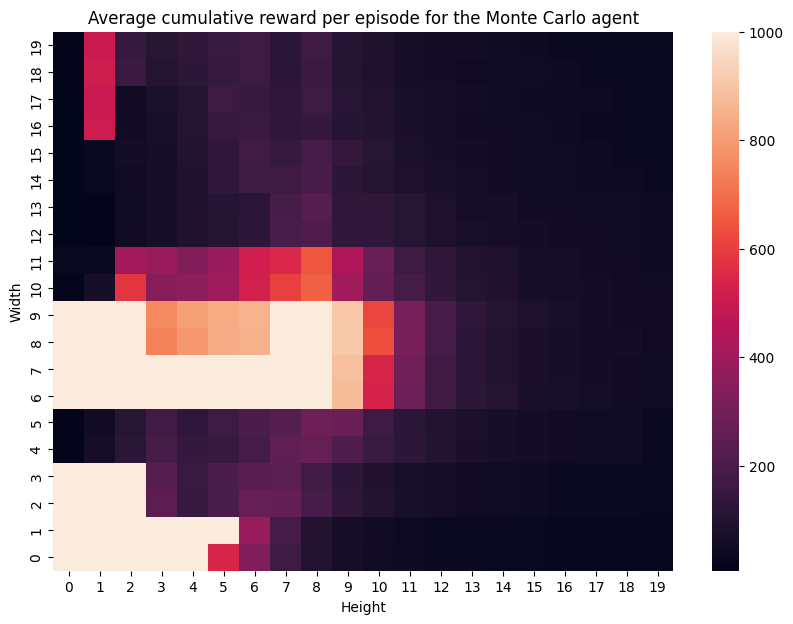

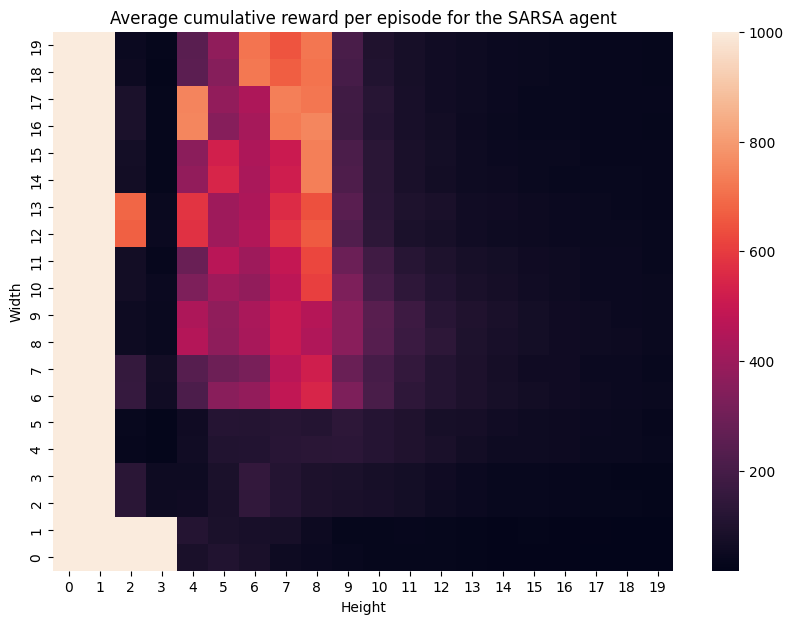

In [35]:
# Plot the average cumulative rewards per episode for the Monte Carlo agent
average_cumulative_rewards_MC = np.zeros((20, 20))
for width in range(11, 31, 1):
    for height in range(6, 26, 1):
        average_cumulative_rewards_MC[width-11, height-6] = np.mean(results_MC[(width, height)][0])

plt.figure(figsize=(10, 7))
sns.heatmap(average_cumulative_rewards_MC, xticklabels=1, yticklabels=1).invert_yaxis()
plt.title('Average reward per episode for the Monte Carlo agent')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

# Plot the average cumulative rewards per episode for the SARSA agent
average_cumulative_rewards_SARSA = np.zeros((20, 20))
for width in range(11, 31, 1):
    for height in range(6, 26, 1):
        average_cumulative_rewards_SARSA[width-11, height-6] = np.mean(results_SARSA[(width, height)][0])

plt.figure(figsize=(10, 7))
sns.heatmap(average_cumulative_rewards_SARSA, xticklabels=1, yticklabels=1).invert_yaxis()
plt.title('Average reward per episode for the SARSA agent')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()